## Validating mRNA-protein (RPPA and MS) correlation results using linear regression

**Input:**  
- Source data for figures 1 and 2 

**Output:**  
- Figure S1

### Import Packages

In [1]:
import os
import numpy as np
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

import graphing_utils
import customized_plot 

In [2]:
get_table_path = lambda fname: os.path.normpath('../tables/' + fname)
get_figure_path = lambda fname: os.path.normpath('../figures/' + fname)

file_sourceData_Figure2 = get_table_path('SourceDataForFigure2.csv')
file_sourceData_Figure3 = get_table_path('SourceDataForFigure3.csv')
file_sourceData_Figure4 = get_table_path('SourceDataForFigure4.csv')
file_sourceData_FigureS1 = get_table_path('SourceDataForFigureS1.csv')

### Load Data

In [3]:
mRNA_RPPA_correlation = pd.read_csv(file_sourceData_Figure2, index_col=0)
mRNA_RPPA_correlation[:2]

,BrCa,Ovarian,CoadRead,UCEC,KIRC,LGG,ValidationStatus
ABL1,0.213988,0.312046,0.106767,0.137492,0.380421,0.052327,Valid
ACVRL1,0.142387,0.026260,0.119359,0.158536,-0.087107,0.175950,Use with Caution


In [4]:
mRNA_MS_correlation = pd.read_csv(file_sourceData_Figure3, index_col=0)
mRNA_MS_correlation[:2]

,BrCa (2016),Ovarian,CRC (2014),EC,ccRCC,GBM,ValidationStatus
ABL1,0.150906,NaN,NaN,0.406298,0.594155,0.484601,Valid
ADAR,0.579661,0.381322,0.407009,0.675960,0.307923,0.378615,Valid


In [5]:
ccle_mRNA_protein_correlation = pd.read_csv(file_sourceData_Figure4, index_col=0)
ccle_mRNA_protein_correlation[:2]

,mRNA_RPPA_cor,mRNA_MS_cor,ValidationStatus
ACACA,0.566263,0.371653,Use with Caution
ACTB,0.386765,0.481398,Use with Caution


#### Performing linear regression to obtain R-squared

In [6]:
import statsmodels.api as sm

# regressing y on x 
def get_r2_after_model_fit(x, y):
#     x_subset, y_subset = cu.get_matched_index(x, y) 
    print("Common proteins: ", x.shape[0])
    est = sm.OLS(y, sm.add_constant(x.astype(float))).fit()
    return round(est.rsquared_adj *100, 2)

In [7]:
r2_antibody_validation_status_RPPA = {}
mRNA_RPPA_correlation['ValidationStatus'].replace({'Valid': 1, 'Use with Caution': 0}, inplace=True)
ccle_mRNA_protein_correlation['ValidationStatus'].replace({'Valid': 1, 'Use with Caution': 0}, inplace=True)

r2_antibody_validation_status_RPPA['BrCa'] = get_r2_after_model_fit(x=mRNA_RPPA_correlation.dropna(subset=['BrCa'])['ValidationStatus'], 
                                                               y=mRNA_RPPA_correlation['BrCa'].dropna())
r2_antibody_validation_status_RPPA['Ovarian'] = get_r2_after_model_fit(x=mRNA_RPPA_correlation.dropna(subset=['Ovarian'])['ValidationStatus'], 
                                                                  y=mRNA_RPPA_correlation['Ovarian'].dropna())
r2_antibody_validation_status_RPPA['CoadRead'] = get_r2_after_model_fit(x=mRNA_RPPA_correlation.dropna(subset=['CoadRead'])['ValidationStatus'], 
                                                                   y=mRNA_RPPA_correlation['CoadRead'].dropna())
r2_antibody_validation_status_RPPA['UCEC'] = get_r2_after_model_fit(x=mRNA_RPPA_correlation.dropna(subset=['UCEC'])['ValidationStatus'], 
                                                               y=mRNA_RPPA_correlation['UCEC'].dropna())
r2_antibody_validation_status_RPPA['KIRC'] = get_r2_after_model_fit(x=mRNA_RPPA_correlation.dropna(subset=['KIRC'])['ValidationStatus'], 
                                                               y=mRNA_RPPA_correlation['KIRC'].dropna())
r2_antibody_validation_status_RPPA['LGG'] = get_r2_after_model_fit(x=mRNA_RPPA_correlation.dropna(subset=['LGG'])['ValidationStatus'], 
                                                              y=mRNA_RPPA_correlation['LGG'].dropna())
r2_antibody_validation_status_RPPA['CCLE'] = get_r2_after_model_fit(x=ccle_mRNA_protein_correlation.dropna(subset=['mRNA_RPPA_cor'])['ValidationStatus'], 
                                                              y=ccle_mRNA_protein_correlation['mRNA_RPPA_cor'].dropna())

Common proteins:  152
Common proteins:  152
Common proteins:  151
Common proteins:  151
Common proteins:  154
Common proteins:  146
Common proteins:  123


C:\Users\swath\Anaconda3\envs\thesis\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [8]:
r2_antibody_validation_status_RPPA

{'BrCa': 7.87,
 'Ovarian': 4.16,
 'CoadRead': 7.49,
 'UCEC': 4.66,
 'KIRC': 10.48,
 'LGG': 6.0,
 'CCLE': 3.45}

In [9]:
print("Mean: ", round((sum(r2_antibody_validation_status_RPPA.values()) - 3.45) / (len(r2_antibody_validation_status_RPPA) - 1), 2))

Mean:  6.78


In [10]:
print("Mean: ", round(sum(r2_antibody_validation_status_RPPA.values()) / len(r2_antibody_validation_status_RPPA), 2))
r2_antibody_validation_status_RPPA

Mean:  6.3


{'BrCa': 7.87,
 'Ovarian': 4.16,
 'CoadRead': 7.49,
 'UCEC': 4.66,
 'KIRC': 10.48,
 'LGG': 6.0,
 'CCLE': 3.45}

In [11]:
r2_antibody_validation_status_MS = {}
mRNA_MS_correlation['ValidationStatus'].replace({'Valid': 1, 'Use with Caution': 0}, inplace=True)
ccle_mRNA_protein_correlation['ValidationStatus'].replace({'Valid': 1, 'Use with Caution': 0}, inplace=True)

r2_antibody_validation_status_MS['BrCa (2016)'] = get_r2_after_model_fit(x=mRNA_MS_correlation.dropna(subset=['BrCa (2016)'])['ValidationStatus'], 
                                                               y=mRNA_MS_correlation['BrCa (2016)'].dropna())
r2_antibody_validation_status_MS['Ovarian'] = get_r2_after_model_fit(x=mRNA_MS_correlation.dropna(subset=['Ovarian'])['ValidationStatus'], 
                                                                  y=mRNA_MS_correlation['Ovarian'].dropna())
r2_antibody_validation_status_MS['CRC (2014)'] = get_r2_after_model_fit(x=mRNA_MS_correlation.dropna(subset=['CRC (2014)'])['ValidationStatus'], 
                                                                   y=mRNA_MS_correlation['CRC (2014)'].dropna())
r2_antibody_validation_status_MS['EC'] = get_r2_after_model_fit(x=mRNA_MS_correlation.dropna(subset=['EC'])['ValidationStatus'], 
                                                               y=mRNA_MS_correlation['EC'].dropna())
r2_antibody_validation_status_MS['ccRCC'] = get_r2_after_model_fit(x=mRNA_MS_correlation.dropna(subset=['ccRCC'])['ValidationStatus'], 
                                                               y=mRNA_MS_correlation['ccRCC'].dropna())
r2_antibody_validation_status_MS['GBM'] = get_r2_after_model_fit(x=mRNA_MS_correlation.dropna(subset=['GBM'])['ValidationStatus'], 
                                                              y=mRNA_MS_correlation['GBM'].dropna())
r2_antibody_validation_status_MS['CCLE'] = get_r2_after_model_fit(x=ccle_mRNA_protein_correlation.dropna(subset=['mRNA_MS_cor'])['ValidationStatus'], 
                                                              y=ccle_mRNA_protein_correlation['mRNA_MS_cor'].dropna())

Common proteins:  121
Common proteins:  107
Common proteins:  69
Common proteins:  141
Common proteins:  122
Common proteins:  131
Common proteins:  123


In [12]:
r2_antibody_validation_status_MS

{'BrCa (2016)': -0.03,
 'Ovarian': -0.54,
 'CRC (2014)': 4.36,
 'EC': -0.62,
 'ccRCC': -0.65,
 'GBM': -0.29,
 'CCLE': 1.71}

In [13]:
print("Mean: ", round((sum(r2_antibody_validation_status_MS.values()) - 1.71) / (len(r2_antibody_validation_status_MS) - 1), 2))

Mean:  0.37


In [14]:
r2 = pd.concat([pd.DataFrame.from_dict(r2_antibody_validation_status_MS, 
                                       orient='index').rename(columns={0: 'mRNA-protein (MS) correlation'}), 
                pd.DataFrame.from_dict(r2_antibody_validation_status_RPPA, 
                                       orient='index').rename(columns={0: 'mRNA-protein (RPPA) correlation'})],
               axis=1).rename(index ={'BrCa (2016)' : 'Breast (2012, 2016)', 'BrCa': 'Breast (2012, 2016)', 
                                      'CRC (2014)': 'Colorectal (2012, 2014)', 'CoadRead': 'Colorectal (2012, 2014)', 
                                      'UCEC': 'Endometrial (2013, 2020)', 'EC': 'Endometrial (2013, 2020)', 
                                      'LGG':'Brain (2015, 2020)', 'GBM': 'Brain (2015, 2020)',
                                      'KIRC': 'Kidney (2013, 2019)', 'ccRCC': 'Kidney (2013, 2019)', 'Ovarian': 'Ovarian (2011, 2016)'})
r2 = r2.groupby(r2.index).mean()
r2

,mRNA-protein (MS) correlation,mRNA-protein (RPPA) correlation
"Brain (2015, 2020)",-0.29,6.00
"Breast (2012, 2016)",-0.03,7.87
CCLE,1.71,3.45
"Colorectal (2012, 2014)",4.36,7.49
"Endometrial (2013, 2020)",-0.62,4.66
"Kidney (2013, 2019)",-0.65,10.48
"Ovarian (2011, 2016)",-0.54,4.16


In [15]:
r2.drop(index=['CCLE']).mean()

mRNA-protein (MS) correlation      0.371667
mRNA-protein (RPPA) correlation    6.776667
dtype: float64

In [16]:
r2_melted  = pd.melt(r2.reset_index().rename(columns={'index': 'Study'}), 
                     id_vars='Study', value_vars=['mRNA-protein (MS) correlation', 'mRNA-protein (RPPA) correlation'], 
                     var_name='Response variable in linear regression', value_name='R2')
r2_melted.to_csv(file_sourceData_FigureS1, index=False)
r2_melted[:2]

,Study,Response variable in linear regression,R2
0,"Brain (2015, 2020)",mRNA-protein (MS) correlation,-0.29
1,"Breast (2012, 2016)",mRNA-protein (MS) correlation,-0.03


In [17]:
palette = [graphing_utils.get_color(color) for color in ['denim-blue', 'dark-sky-blue']]
args = graphing_utils.additional_plot_parameters(xlab="R-squared (%)", ylab=None, palette = palette)

In [18]:
get_order = lambda df: df.groupby(by=['Study']).max().sort_values('R2').index.values

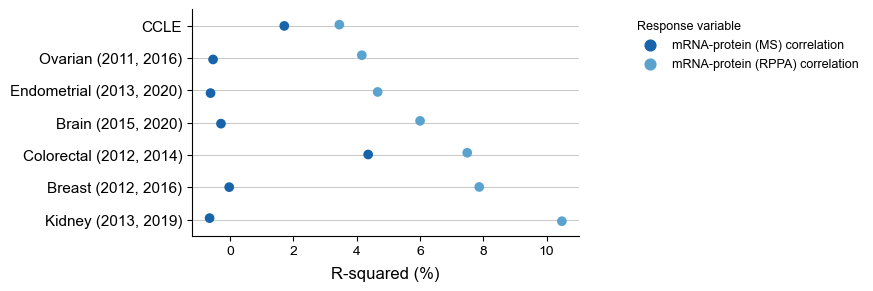

In [19]:
with plt.rc_context({'axes.linewidth': 0.8, 'axes.labelsize':12, 'axes.spines.left': True, 'xtick.labelsize':10, 
                     'ytick.labelsize':11}):
    figure, ax = plt.subplots(1, 1, figsize=(5, 3))
    sns.stripplot(x='R2', y='Study', data=r2_melted, ax=ax, hue='Response variable in linear regression', s=7, 
                  order=get_order(r2_melted),
                  palette= args.palette, )
    ax.legend(title='Response variable', 
              title_fontsize='medium', framealpha=1, 
              facecolor='white', bbox_to_anchor = (1.75, 1))._legend_box.align = "left"
    customized_plot.customise_plot(ax, args)
    figure.savefig(get_figure_path('FigureS1.svg'), bbox_inches='tight', dpi=300)

<div class="alert alert-block alert-success">
    mRNA-protein (RPPA) correlation is better explained by antibody validation status compared to mRNA-protein (MS) correlation. 
</div>